In [66]:
#Import pandas and numpy
import pandas as pd
import numpy as np


In [67]:
#Importing libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
#Reading in the data
df=pd.read_csv('BankCustomers.csv')

In [69]:
#Finding the columns in dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
#Checking the Categorical columns
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [73]:
#Separating the dependent and independent features. Dropping unnecessary columns from the independent features
X=df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'],axis=1)
y=df['Exited']

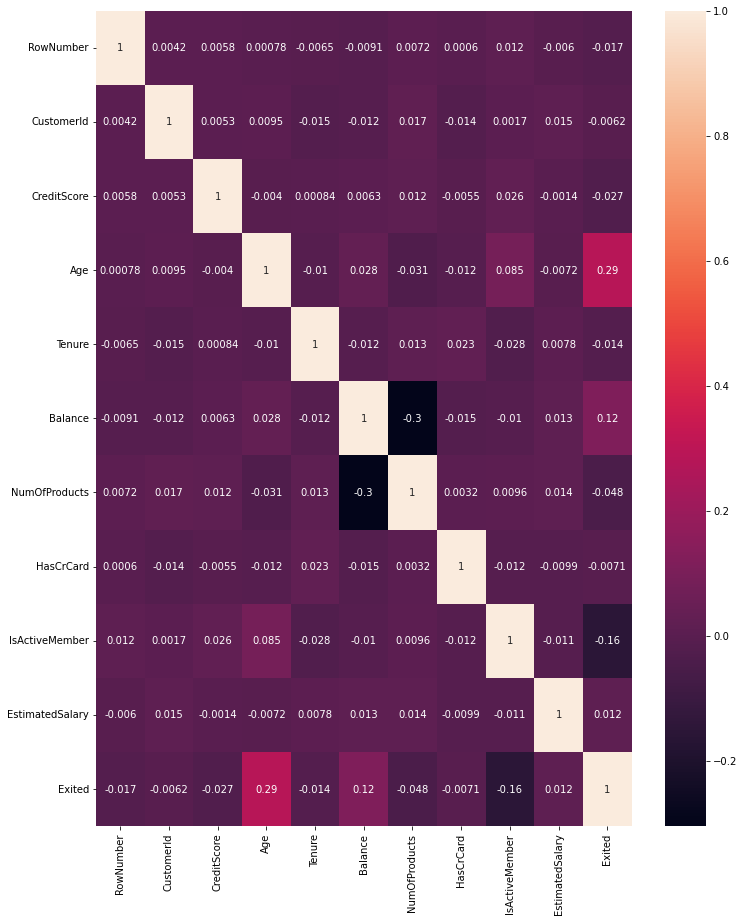

In [74]:
#Plotting correlation matrix
corrmat=df.corr()
top_features=corrmat.index
plt.figure(figsize=(12,15))
sns.heatmap(df[top_features].corr(),annot=True)
plt.show()

(array([2790., 5500., 1351.,  335.,   24.]),
 array([18. , 32.8, 47.6, 62.4, 77.2, 92. ]),
 <BarContainer object of 5 artists>)

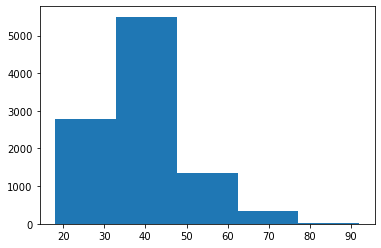

In [75]:
#Checking distribution of Age feature
plt.hist(df['Age'],bins=5)

In [76]:
#encoding Categorical features using get_dummies
X=pd.get_dummies(X,drop_first=True)

In [77]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [78]:
print(X.shape,y.shape)

(10000, 11) (10000,)


In [79]:
#Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [80]:
#Performing standard scaler to normalize the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [81]:
#Since its a classification problem, checking LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred=lr.predict(X_test_scaled)

In [82]:
#Finding accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
ac=accuracy_score(lr_pred,y_test)
cm=confusion_matrix(lr_pred,y_test)
print(ac,'\n',cm)

0.8083333333333333 
 [[2287  472]
 [ 103  138]]


Thus accuracy with LogisticRegression is 0.812

In [83]:
import tensorflow as tf
tf.__version__

'2.10.1'

In [84]:
#Loading useful models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [85]:
#Defining the model and compiling
model=Sequential()
model.add(Dense(activation='relu',units=6,input_dim=11,kernel_initializer='uniform'))
model.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))
model.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#print(model.history())

In [86]:
#Fitting the model 
model.fit(X_train_scaled,y_train,epochs=10,batch_size=64)

Epoch 1/10
110/110 [==============================] - 3s 1ms/step - loss: 0.6731 - accuracy: 0.7916
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7961
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7961
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7961
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7961
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7961
Epoch 7/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7961
Epoch 8/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7961
Epoch 9/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7961
Epoch 10/10
110/110 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7961

In [87]:
#Predicting with new model
y_pred=model.predict(X_test_scaled)
y_pred=(y_pred>=0.5)


94/94 [==============================] - 2s 1ms/step


In [88]:
#Checking accuracy and confusion matrix
ac1=accuracy_score(y_pred,y_test)
cm1=confusion_matrix(y_pred,y_test)
print(ac1,'\n',cm1)

0.7966666666666666 
 [[2390  610]
 [   0    0]]


Thus accuracy with ANN is 0.79, lesser than the Logistic Regression